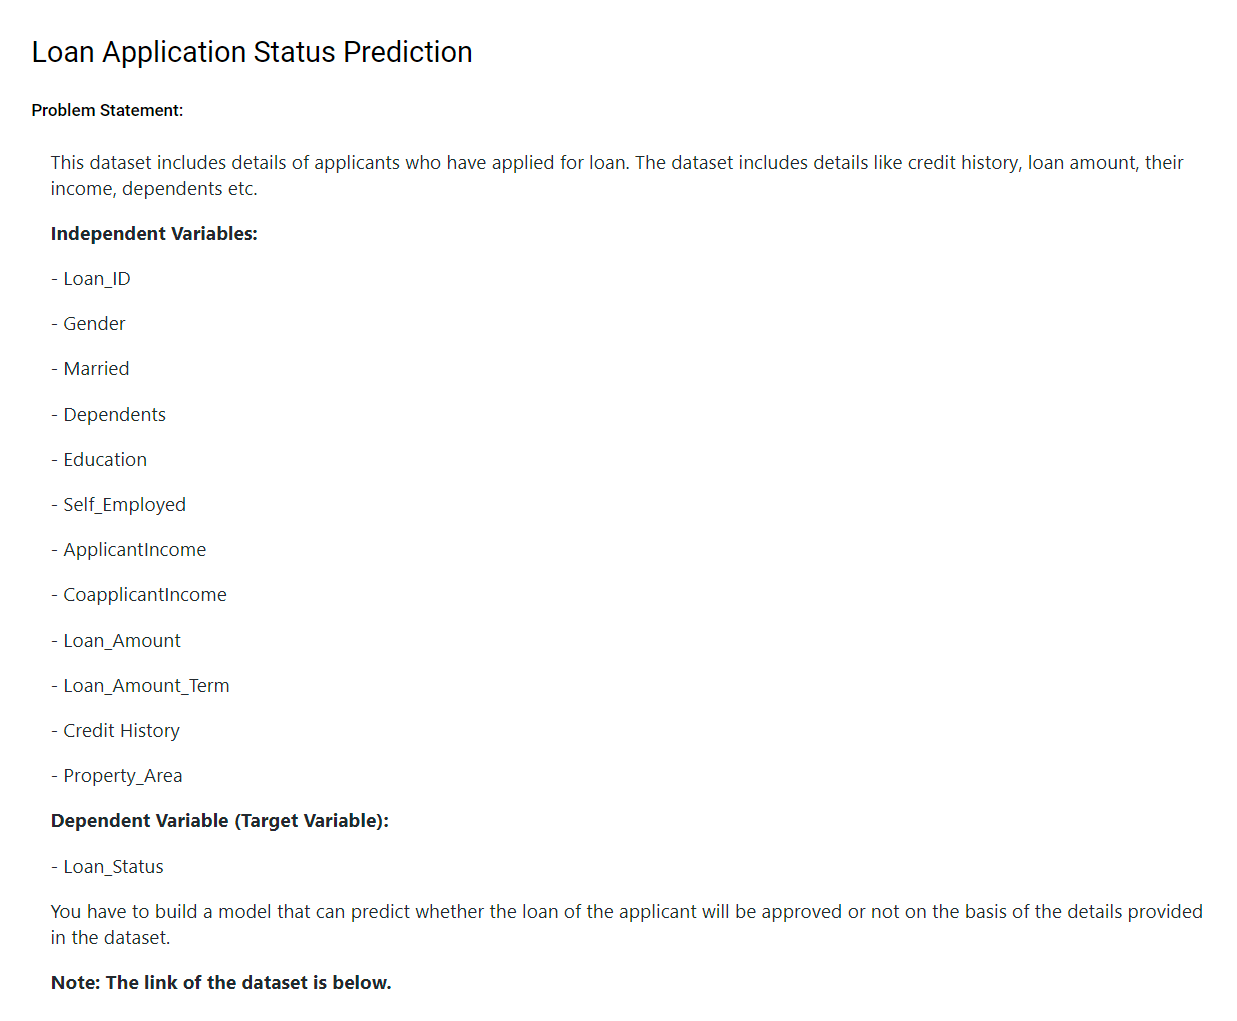

# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("loan_prediction.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

# Observation

this dataset has 614 rows and 13 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Observation

We have integer,float,and object data in dataset

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# observation

we can see 50% and mean data  ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term, Credit_History, s data are skewed
       
       

and comparing 75% and max we can see there are possible outliers in columns like ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term, Credit_History,

In [10]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# observaton

we have categorical values 

In [42]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# null value check

<AxesSubplot:>

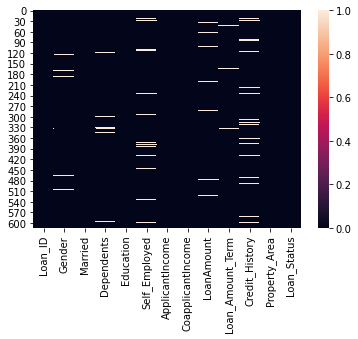

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# observation

Null values are found so removing them

# Null value handling

In [13]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="mean")
sii = SimpleImputer(strategy="most_frequent")

In [14]:
cat=['Gender','Married','Self_Employed','Dependents']
num=['LoanAmount','Loan_Amount_Term','Credit_History']
for ca in cat:
    df[ca] = sii.fit_transform(df[ca].values.reshape(-1,1))
    
    
for nu in num:
    df[nu] = si.fit_transform(df[nu].values.reshape(-1,1))
    

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# observation

Null values are removed

# dropping Loan_ID as it is not useful for our prediction

In [16]:
df.drop("Loan_ID",inplace=True,axis=1)

# univariate analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

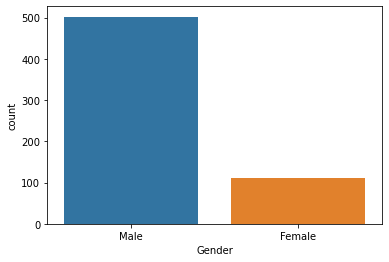

In [26]:
sns.countplot(df["Gender"])

# Observation

Male are higher compared to female in loan application

<AxesSubplot:xlabel='Married', ylabel='count'>

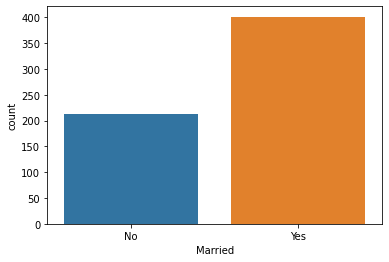

In [27]:
sns.countplot(df['Married'])

# observation

Married People are higher in loan application

<AxesSubplot:xlabel='Dependents', ylabel='count'>

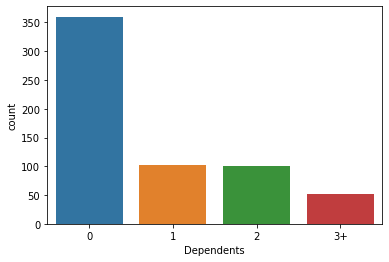

In [28]:
sns.countplot(df[ 'Dependents'])

# observation

0 dependents are higher with 350+ data compared to 1,2 , 3+

<AxesSubplot:xlabel='Education', ylabel='count'>

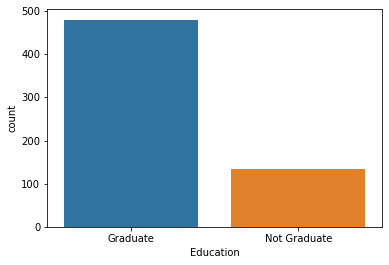

In [29]:
sns.countplot(df['Education'])

# observation

Graduates are applying loan more compared to non graduate

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

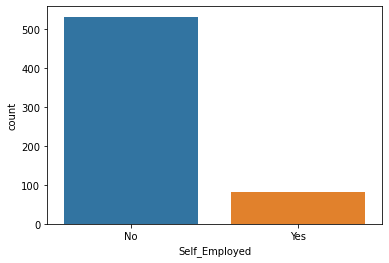

In [32]:
sns.countplot(df['Self_Employed'])

# observation

Self Employed people are applying very less loan compared to others

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

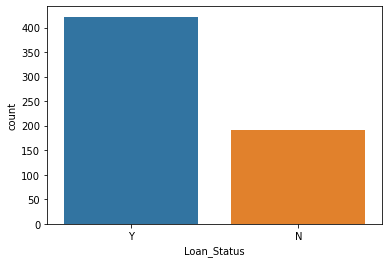

In [34]:
sns.countplot(df['Loan_Status'])

# observation

Yes data is higher compared to No in loan_status so we need to balance data before machine learning

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

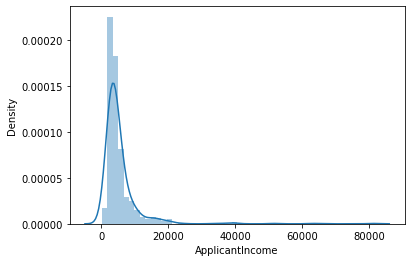

In [35]:
sns.distplot(df['ApplicantIncome'])

# observation

'ApplicantIncome' is positvely skewed

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

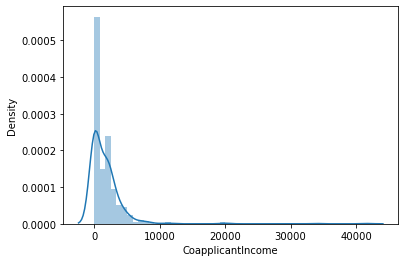

In [36]:
sns.distplot(df['CoapplicantIncome'])

# observation



'CoapplicantIncome' is positively skewed

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

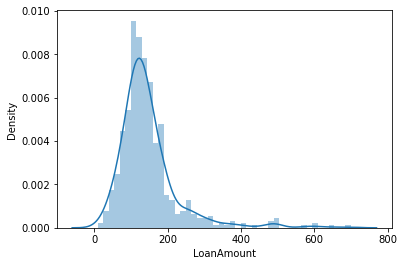

In [37]:
sns.distplot(df['LoanAmount'])

# observation

'LoanAmount'is also positively skewed

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

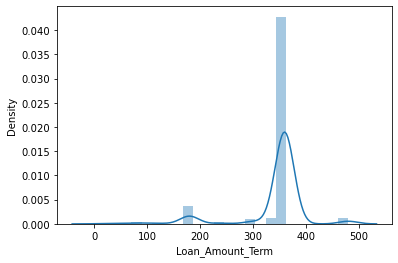

In [38]:
sns.distplot(df['Loan_Amount_Term'])

# observation

'Loan_Amount_Term'is  negatively skewed

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

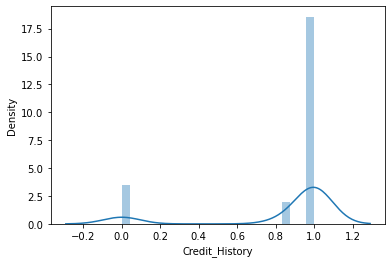

In [39]:
sns.distplot(df['Credit_History'])

# Observation

'Credit_History'is Negatively skewed

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

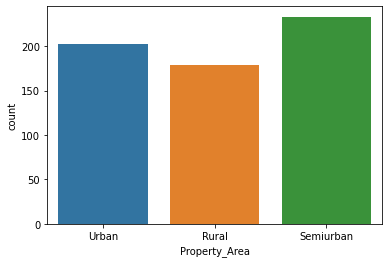

In [41]:
sns.countplot(df['Property_Area'])

# observation

semi urban properties are higher

<AxesSubplot:>

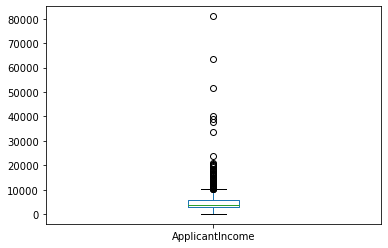

In [43]:
df['ApplicantIncome'].plot.box()

# observation

'ApplicantIncome' seems to have outliers

<AxesSubplot:>

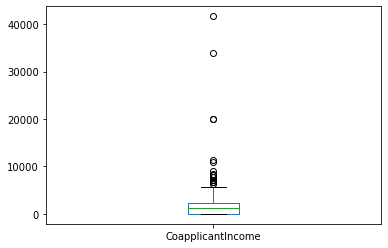

In [45]:
df['CoapplicantIncome'].plot.box()

# Observation

'CoapplicantIncome' seems to have outliers

<AxesSubplot:>

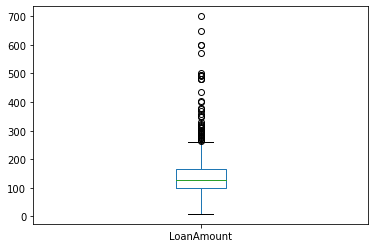

In [47]:
df[ 'LoanAmount'].plot.box()

# Observation

 'LoanAmount' seems to have outliers

<AxesSubplot:>

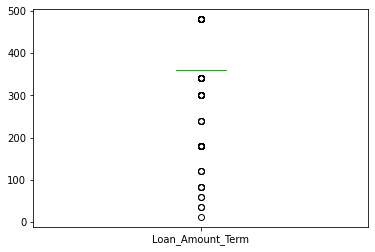

In [49]:
df['Loan_Amount_Term'].plot.box()

# Observation

'Loan_Amount_Term' has outliers

<AxesSubplot:>

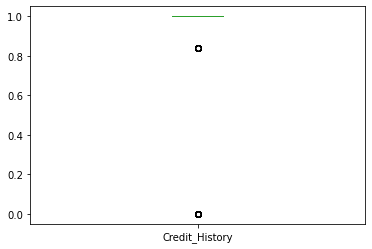

In [48]:
df[ 'Credit_History'].plot.box()

# Observation

'Credit_History' seems to have outliers

# Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

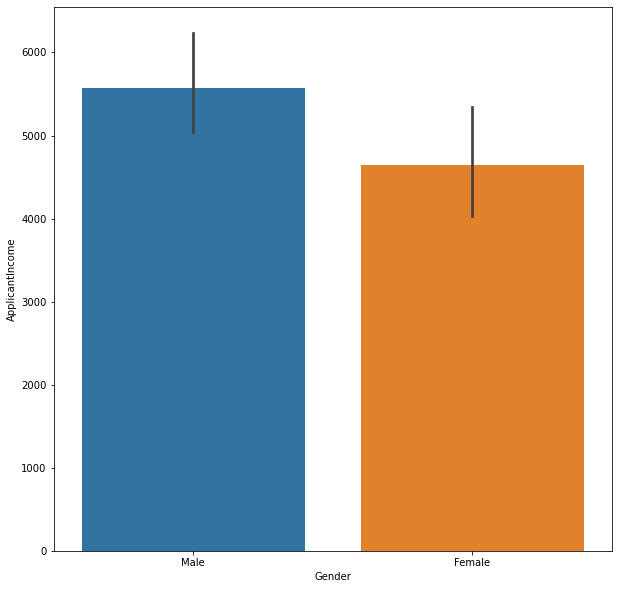

In [56]:
plt.figure(figsize=(10,10))
sns.barplot(df['Gender'],df['ApplicantIncome'])

# Observation

 Males seems to have higher income compared to female

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

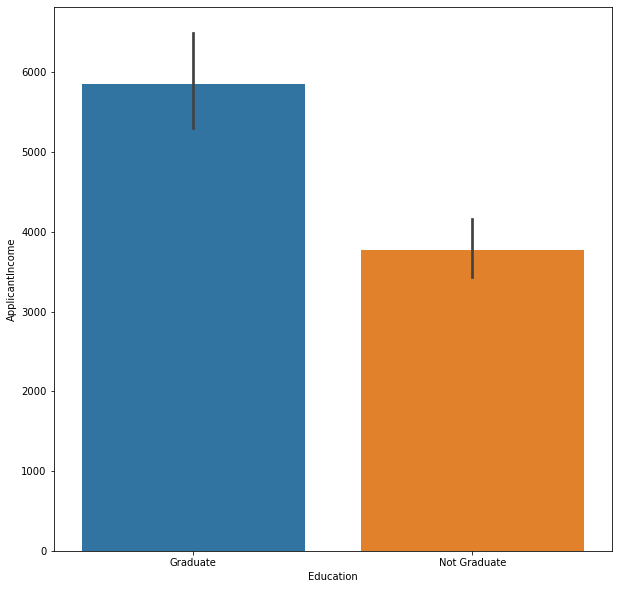

In [58]:
plt.figure(figsize=(10,10))
sns.barplot(df['Education'],df['ApplicantIncome'])

# Observation

Graduate seems to earn more than Non graduates

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

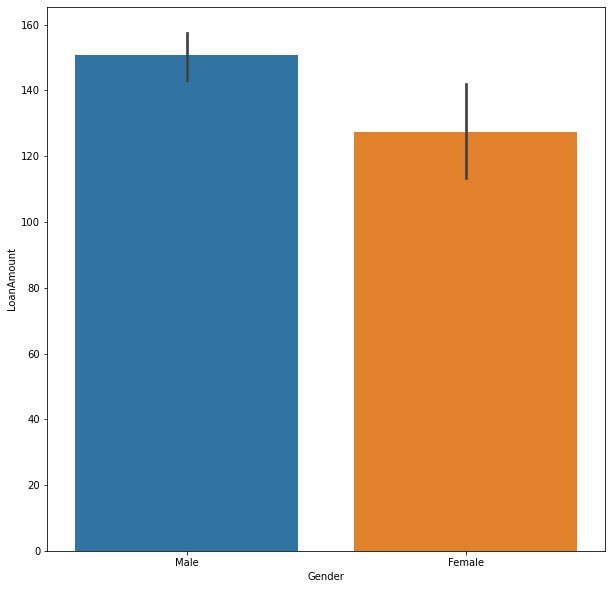

In [61]:
plt.figure(figsize=(10,10))
sns.barplot(df['Gender'],df['LoanAmount'])

# observation

loan amount seems to be higher for Male

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

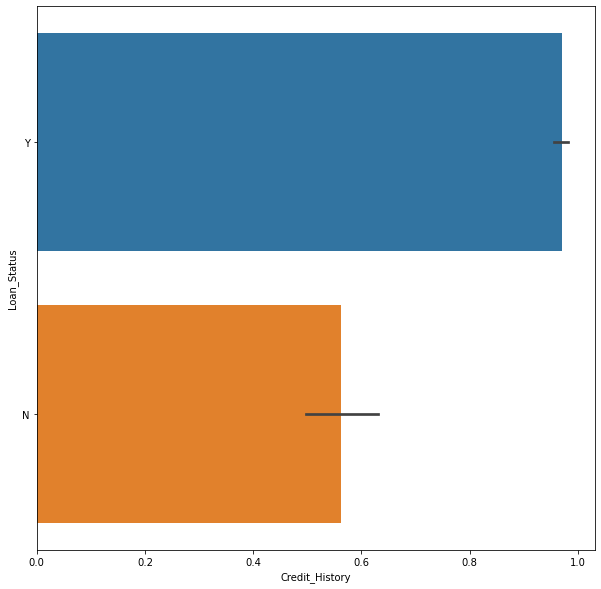

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(df['Credit_History'],df['Loan_Status'])

# observations

Loan is given to majority with good credit history 

<AxesSubplot:xlabel='LoanAmount', ylabel='Property_Area'>

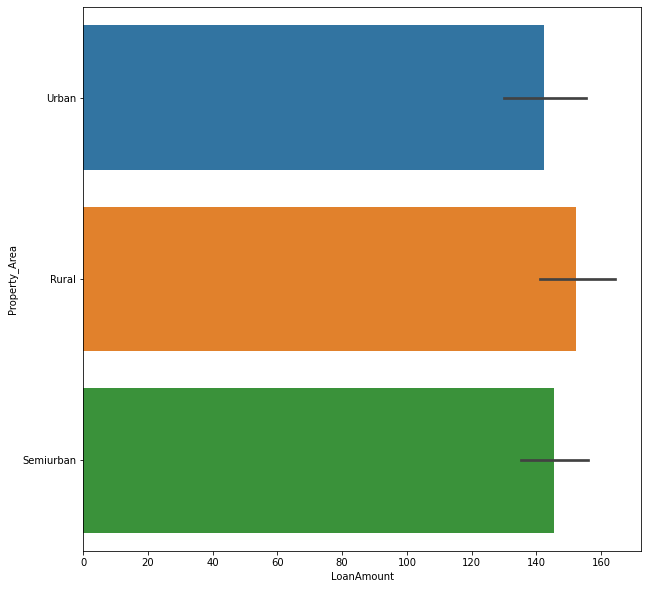

In [68]:
plt.figure(figsize=(10,10))
sns.barplot(df['LoanAmount'],df['Property_Area'])

# Observation

For Rural Areas Loan Amount given is higher

<AxesSubplot:xlabel='LoanAmount', ylabel='Self_Employed'>

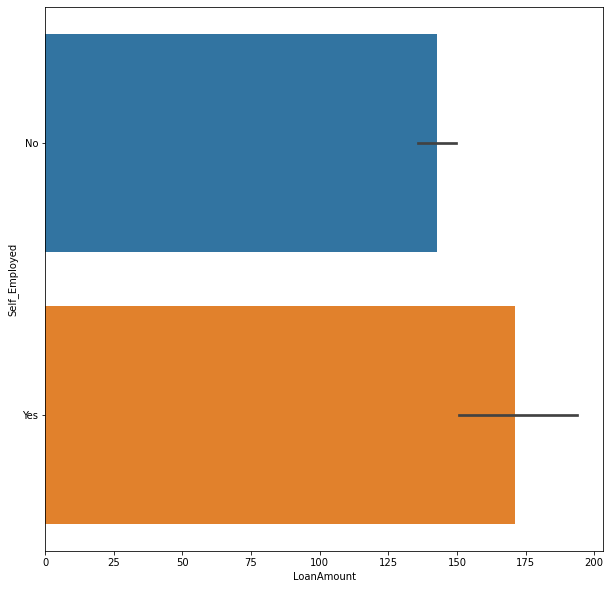

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(df['LoanAmount'],df['Self_Employed'])

# Observation

Self Employed people get more loan amount

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

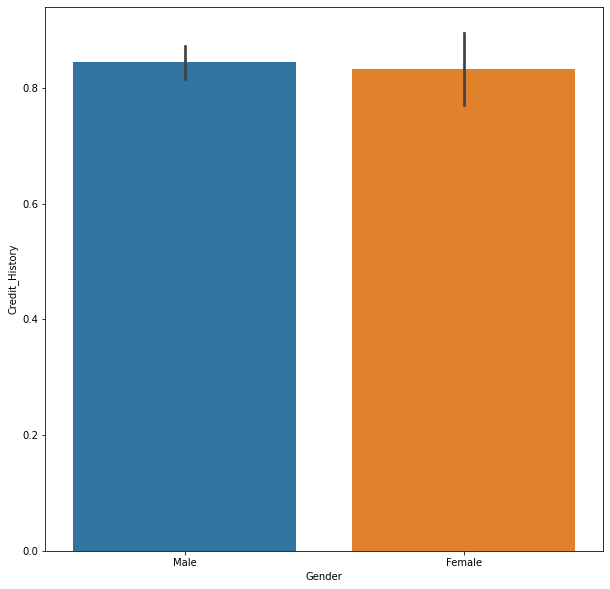

In [71]:
plt.figure(figsize=(10,10))
sns.barplot(df['Gender'],df['Credit_History'])

# observation

both male and female have similar credit history

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

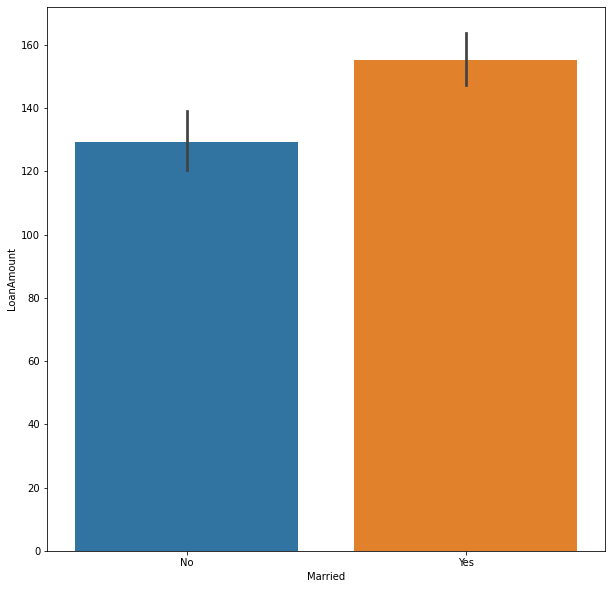

In [72]:
plt.figure(figsize=(10,10))
sns.barplot(df['Married'],df['LoanAmount'])

# observation

Married people get more load amount

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

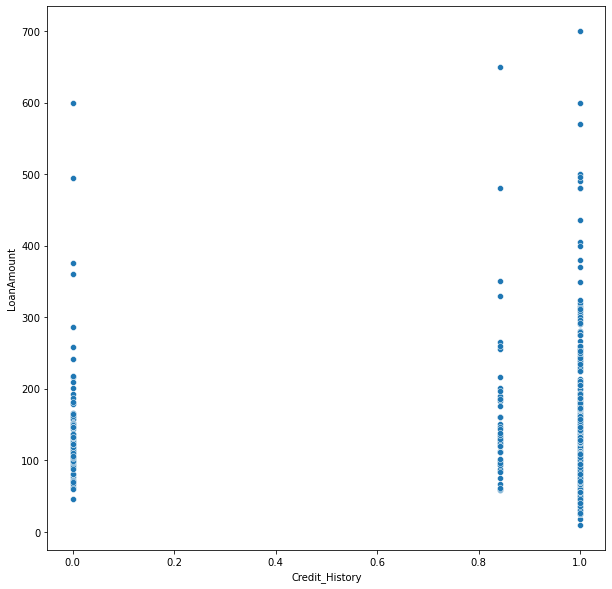

In [75]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['Credit_History'],df['LoanAmount'])

# Observation

With higher credit history loan amount is also higher

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

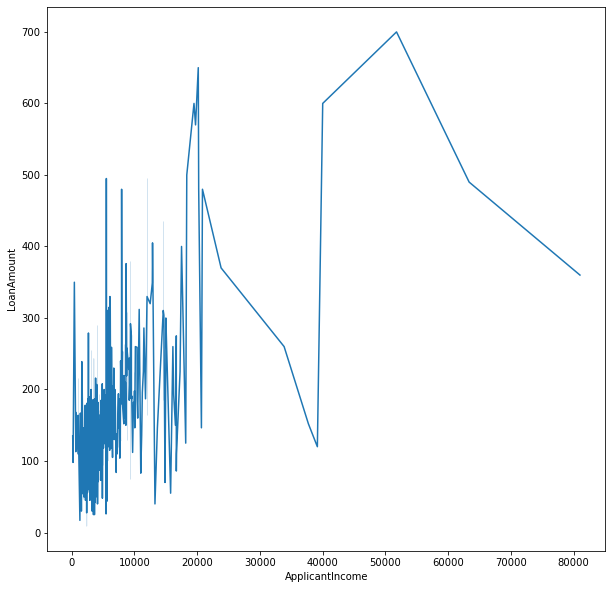

In [80]:
plt.figure(figsize=(10,10))
sns.lineplot(df[ 'ApplicantIncome'],df['LoanAmount'])

# Observation

with increase in applicant income loan amount also increases

<AxesSubplot:xlabel='Self_Employed', ylabel='Credit_History'>

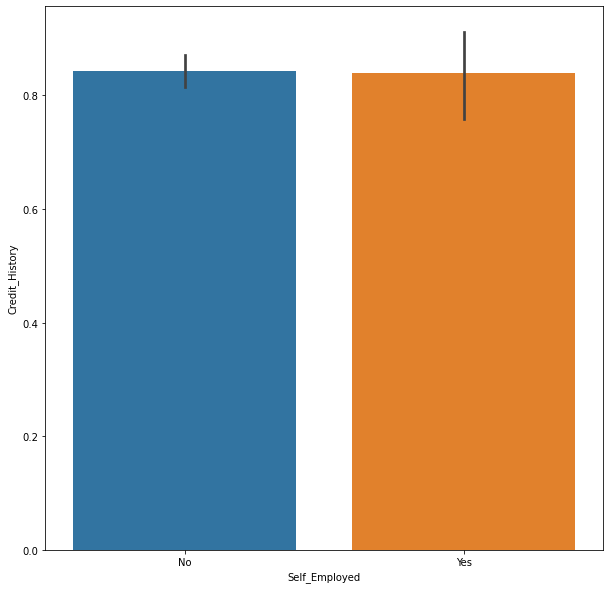

In [83]:
plt.figure(figsize=(10,10))
sns.barplot(df['Self_Employed'],df['Credit_History'])

# Observation

Self employed and not self employed people have same credit history

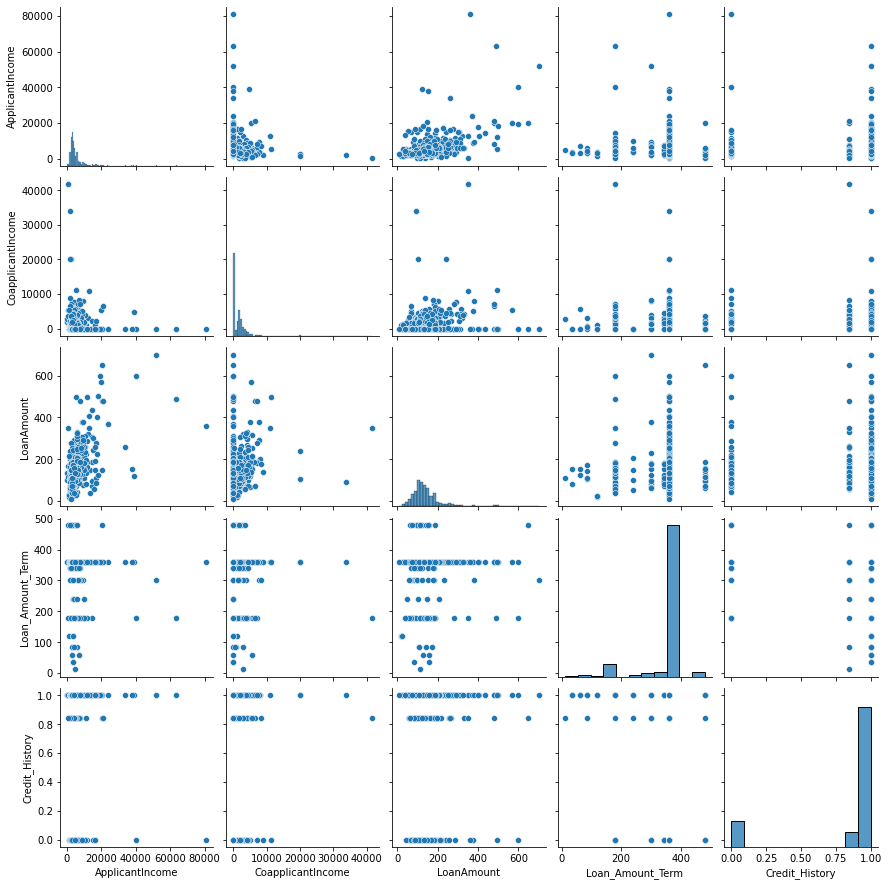

In [84]:
sns.pairplot(df)

# observation

Credit_History  and loan amount is positvely correlation

Loan_Amount and applicant name are positvely correlated

# Encoding

In [85]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [86]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [87]:
df["Dependents"] = df["Dependents"].map({'0':0,'1':1,'2':2,'3+':3})

# observations

manually encoding Dependents

In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [89]:
ordi = ['Education','Property_Area','Self_Employed']
for o in ordi:
    df[o] = OrdinalEncoder().fit_transform(df[o].values.reshape(-1,1))
    
    
df['Loan_Status'] = LabelEncoder().fit_transform(df["Loan_Status"])

In [90]:
a = pd.get_dummies(df["Gender"])
b = pd.get_dummies(df["Married"])
c=a.join(b)
c.head()

,Female,Male,No,Yes
0,0,1,1,0
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,1,0


In [91]:
df.drop(["Gender","Married"],inplace=True,axis=1)

In [92]:
df.dtypes

Dependents             int64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int32
dtype: object

# Observation

we have succesfully converted all object data to numeric data. except for gender and married which we have used onehot encoding method we will append them at last

# Correlation

<AxesSubplot:>

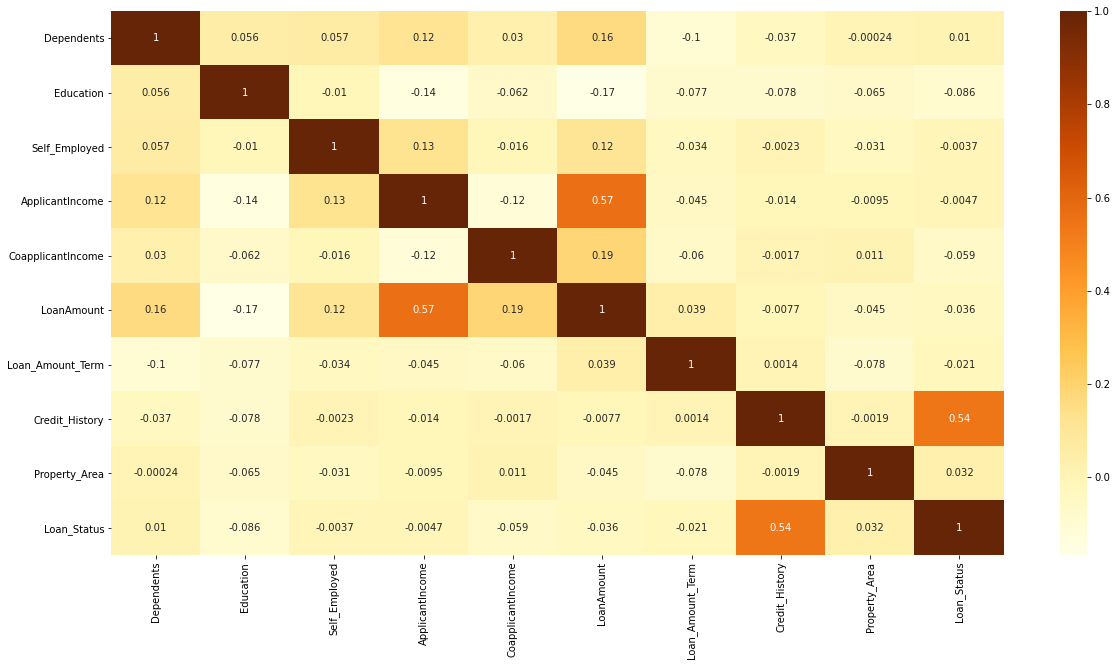

In [93]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr")

In [95]:
df.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Property_Area        0.032112
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

# observation

Credit_History and Loan_Status have positive correlation

Other features have very less correlation

# Skewness

In [96]:
dc1 = df.drop(['Education','Property_Area','Self_Employed','Loan_Status'],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

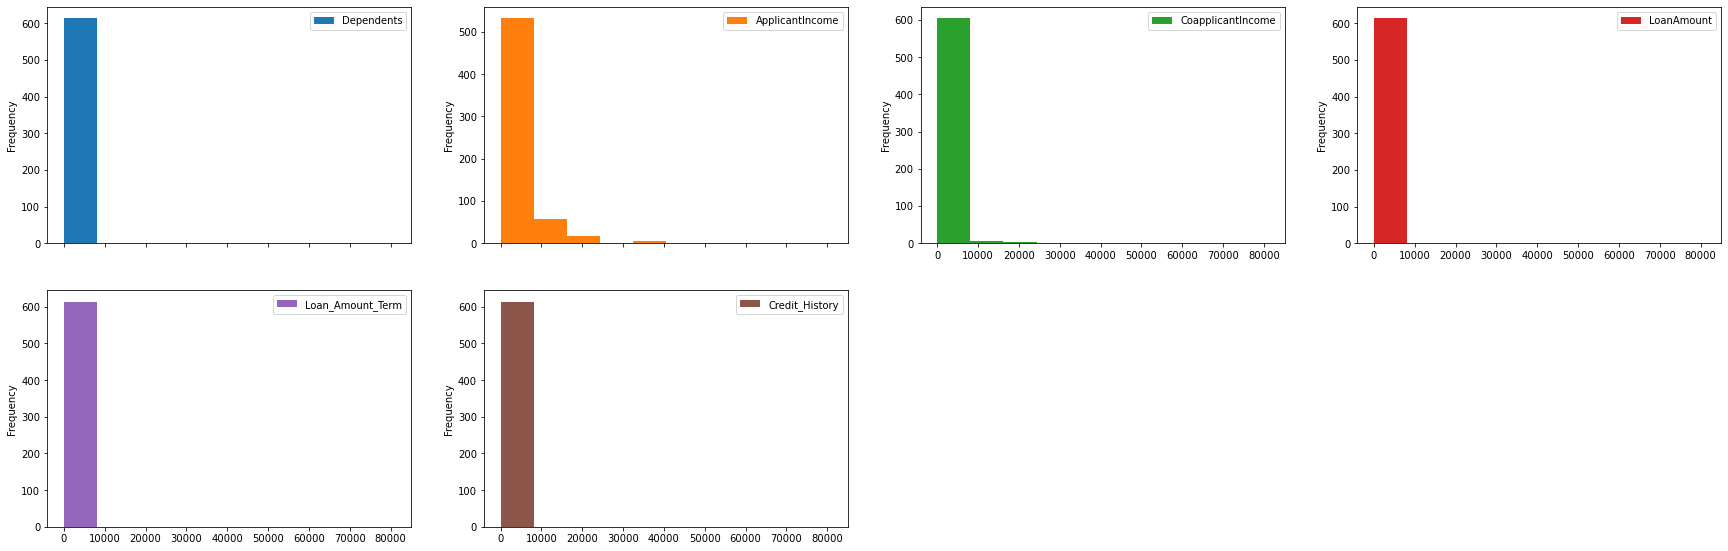

In [97]:
dc1.plot(kind="hist",subplots=True,layout=(4,4),figsize=(30,20))

In [98]:
dc1.skew().sort_values(ascending=False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.726601
Dependents           1.015551
Credit_History      -1.963600
Loan_Amount_Term    -2.389680
dtype: float64

# observation

all features have skewness 

In [21]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [22]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)

In [23]:
dc2.skew()

Dependents           0.441404
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.599912
dtype: float64

# observation

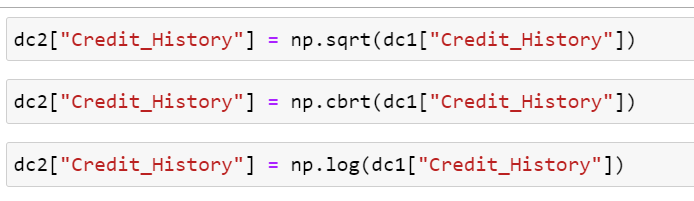

Credit_History skewness cannot be reduced any further than -1.5 i tried using sqrt, cbrt ,log and  box cox cannot be applied as it has negative value

we have removed skewness

# outlier removal

Dependents              AxesSubplot(0.125,0.125;0.110714x0.755)
ApplicantIncome      AxesSubplot(0.257857,0.125;0.110714x0.755)
CoapplicantIncome    AxesSubplot(0.390714,0.125;0.110714x0.755)
LoanAmount           AxesSubplot(0.523571,0.125;0.110714x0.755)
Loan_Amount_Term     AxesSubplot(0.656429,0.125;0.110714x0.755)
Credit_History       AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

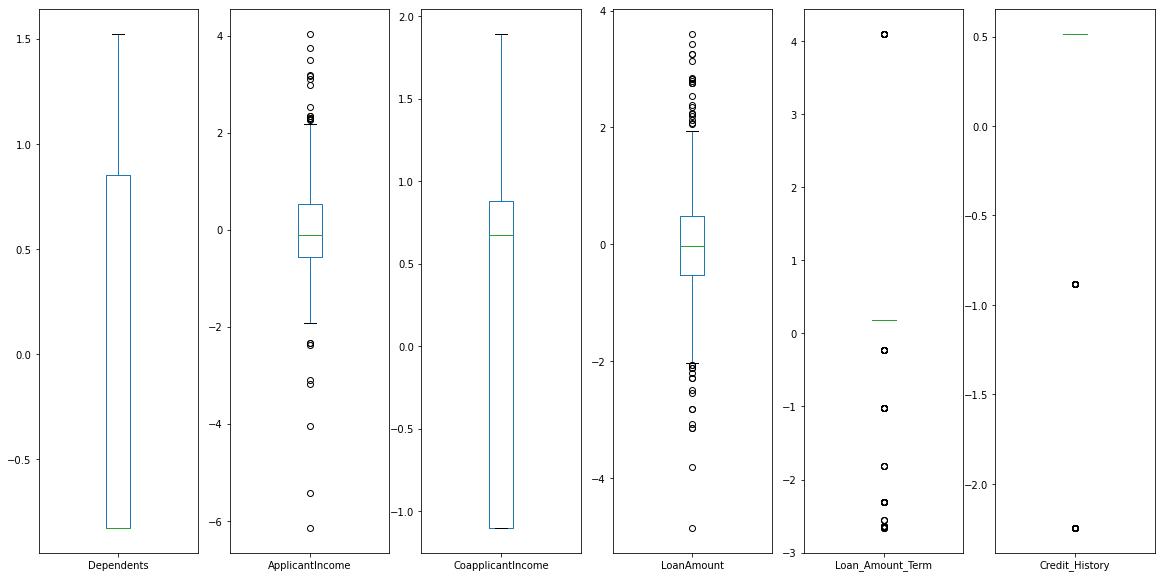

In [54]:
dc2.plot(kind="box",subplots=True,figsize=(20,10))

In [24]:
dc2.shape

(614, 6)

In [25]:
from scipy.stats import zscore

In [26]:
z = np.abs(zscore(dc2))

In [27]:
np.where(z>3)

(array([ 14,  75,  94, 109, 130, 130, 133, 155, 155, 168, 171, 171, 179,
        185, 188, 216, 228, 248, 293, 298, 333, 358, 366, 369, 378, 409,
        443, 468, 500, 500, 516, 555, 561, 568, 573, 600], dtype=int64),
 array([3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 1, 3, 4, 1, 1, 1, 4, 4, 4, 4, 1, 4,
        4, 3, 4, 1, 1, 1, 1, 4, 4, 3, 3, 3, 4, 1], dtype=int64))

In [28]:
df1 = dc2[(z<3).all(axis=1)]

In [29]:
df1.shape

(582, 6)

# observation

the outliers are removed

# data loss

In [61]:
((614-582)/614)*100

5.211726384364821

# observation

5.2% Data loss

# creating categorical data dataframe

In [30]:
dfd = pd.DataFrame()
dfd['Education'] = df['Education']
dfd['Property_Area'] = df['Property_Area']
dfd['Self_Employed'] = df['Self_Employed']
dfd['Loan_Status'] = df['Loan_Status']
dfc = dfd.join(c)
dfc.shape

(614, 8)

# removing the outlier removed rows in categorical dataframe

In [31]:
dfc.drop([ 14,  75,  94, 109, 130, 130, 133, 155, 155, 168, 171, 171, 179,
        185, 188, 216, 228, 248, 293, 298, 333, 358, 366, 369, 378, 409,
        443, 468, 500, 500, 516, 555, 561, 568, 573, 600],axis=0,inplace=True)

In [32]:
dfc.shape

(582, 8)

In [33]:
dfc

,Education,Property_Area,Self_Employed,Loan_Status,Female,Male,No,Yes
0,0.0,2.0,0.0,1,0,1,1,0
1,0.0,0.0,0.0,0,0,1,0,1
2,0.0,2.0,1.0,1,0,1,0,1
3,1.0,2.0,0.0,1,0,1,0,1
4,0.0,2.0,0.0,1,0,1,1,0
5,0.0,2.0,1.0,1,0,1,0,1
6,1.0,2.0,0.0,1,0,1,0,1
7,0.0,1.0,0.0,0,0,1,0,1
8,0.0,2.0,0.0,1,0,1,0,1
9,0.0,1.0,0.0,0,0,1,0,1


# Data Balancing

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

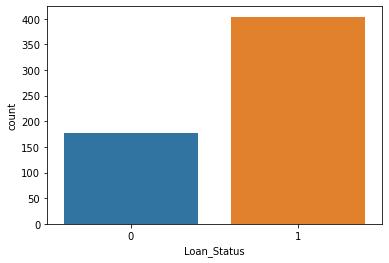

In [34]:
sns.countplot(dfc.iloc[:,-5])

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [36]:
dfb = df1.join(dfc)
dx = dfb.drop("Loan_Status",axis=1)
dy = dfc.iloc[:,-5]
dft,y = sm.fit_resample(dx,dy)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

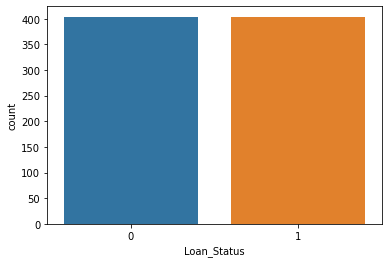

In [37]:
sns.countplot(y)

# Observations

 data is now balanced

# observation

# Multicolinearity Checking

# variance inflation factor

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(13)]
vif["feature names"] = dft.columns

In [40]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
10,13.132448,Male
12,10.916909,Yes
11,6.031244,No
9,3.444235,Female
7,2.652410,Property_Area
1,2.057120,ApplicantIncome
3,1.793520,LoanAmount
2,1.707661,CoapplicantIncome
6,1.438005,Education
0,1.244957,Dependents


# observation

Male has high vif index so dropping it

In [41]:
dft.drop("Male",axis=1,inplace=True)

In [42]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(12)]
vif["feature names"] = dft.columns

In [43]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
11,2.597277,Yes
7,2.583833,Property_Area
10,2.219306,No
1,2.033000,ApplicantIncome
3,1.788774,LoanAmount
2,1.707594,CoapplicantIncome
9,1.436592,Female
6,1.424385,Education
0,1.244678,Dependents
8,1.206761,Self_Employed


# observation

now vif index is within limit so mulitcollinearity is removed from this data set

Multicolinearity Removed

# Standard Scaler

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()
x = sc.fit_transform(dft)
x_final= pd.DataFrame(x,columns=dft.columns)

In [46]:
x_final.shape

(808, 12)

# observation

we have scaled the input data

# model Training starts

# Importing required libraries

In [47]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# i have write a code block that tests data with models and rank them according to cross val score and accuracy score

In [49]:
algo = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
result = pd.DataFrame(columns=["Algorithm Name","Accuracy Score","Cross Validation Score"])

dtc=[]
knc=[]
rfc=[]
abc=[]
fl = [dtc,knc,rfc,abc]

oo=0

for i in algo:
    rand=0
    acc=0    
    
    for ii in range(0,100):
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=ii)
        cf = i
        cf.fit(train_x,train_y)
        pred = cf.predict(test_x)
        ac = accuracy_score(test_y,pred)
        if ac>acc:
            acc=ac
            rand=ii
    print(f' the best random state is {rand} and accuracy score is {acc} for algorithm {i}')
    
    
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=rand)
    cf = i
    cf.fit(train_x,train_y)
    pred = cf.predict(test_x)
    ac = accuracy_score(test_y,pred)
    cv = cross_val_score(cf,x_final,y,cv=5).mean()
    fl[oo].insert(0,i)
    fl[oo].insert(1,ac)
    fl[oo].insert(2,cv)
    result.loc[oo] = fl[oo]
    oo +=1
    
    
final_result = result.sort_values(by=["Accuracy Score","Cross Validation Score"],ascending=False)    

 the best random state is 25 and accuracy score is 0.8395061728395061 for algorithm DecisionTreeClassifier()
 the best random state is 0 and accuracy score is 0.7962962962962963 for algorithm KNeighborsClassifier()
 the best random state is 88 and accuracy score is 0.9074074074074074 for algorithm RandomForestClassifier()
 the best random state is 66 and accuracy score is 0.8518518518518519 for algorithm AdaBoostClassifier()


In [55]:
final_result

,Algorithm Name,Accuracy Score,Cross Validation Score
2,"(DecisionTreeClassifier(max_features='auto', r...",0.907407,0.829346
3,"(DecisionTreeClassifier(max_depth=1, random_st...",0.851852,0.755011
0,DecisionTreeClassifier(),0.827160,0.782279
1,KNeighborsClassifier(),0.796296,0.715382


In [56]:
final_result.loc[2]["Algorithm Name"]

RandomForestClassifier()

# running Support vector classifier induvidually as it consumes more memory

In [57]:
svc = SVC()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=10)
svc.fit(train_x,train_y)
pred = svc.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(svc,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} for SVC' )

 the accuracy socre is 0.7407407407407407, the cross validation score is 0.7128671114178362 for SVC


# Observation

from all the classifier models random forest performed best with accuracy of 90 % and cross val score of 84 %

# HyperParameter Tunining

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
rf = RandomForestClassifier()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 90, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=71)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 90, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600]})

In [60]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

# using the best parameters got in grid search 

In [62]:
rf = RandomForestClassifier(bootstrap=False,max_depth=20,max_features='sqrt',min_samples_leaf=1,n_estimators=400,min_samples_split=2)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=88)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(rf,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} ' )

 the accuracy socre is 0.9135802469135802, the cross validation score is 0.846683536538609 


# Observation

the accuracy score is 91% and cross validation score is 84%

In [63]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        75
           1       0.89      0.95      0.92        87

    accuracy                           0.91       162
   macro avg       0.92      0.91      0.91       162
weighted avg       0.92      0.91      0.91       162



In [64]:
print(confusion_matrix(test_y,pred))

[[65 10]
 [ 4 83]]


# ROC_AUC_CURVE

In [66]:
from sklearn.metrics import plot_roc_curve,roc_auc_score

In [69]:
print(f'The Roc Auc Score is {roc_auc_score(test_y,pred)}')

The Roc Auc Score is 0.9103448275862069


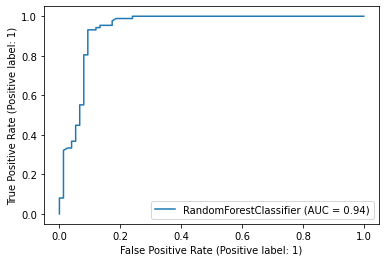

In [70]:
plot_roc_curve(rf,test_x,test_y)

# saving the model

In [71]:
import joblib
joblib.dump(rf,"Loan Application.pkl")

['Loan Application.pkl']